In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [8]:
import matplotlib.pyplot as plt

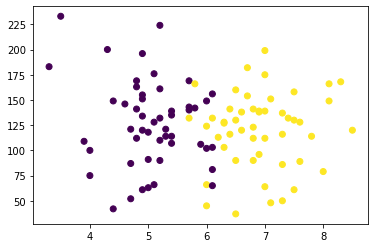

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y.shape

(100,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [21]:
X_train

,cgpa,iq
10,6.0,45.0
47,5.2,161.0
86,5.1,128.0
34,4.8,163.0
58,8.0,79.0
...,...,...
63,6.3,128.0
2,5.3,121.0
64,7.0,64.0
94,4.7,52.0


In [22]:
y_train

10    1
47    0
86    0
34    0
58    1
     ..
63    1
2     0
64    1
94    0
7     0
Name: placement, Length: 90, dtype: int64

In [23]:
X_test

,cgpa,iq
23,4.7,87.0
19,5.2,132.0
37,8.1,149.0
59,4.8,112.0
84,5.7,169.0
98,6.3,103.0
73,4.9,61.0
49,5.4,135.0
91,7.5,158.0
96,4.4,42.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[-0.02066876, -2.00772847],
       [-0.72931199,  0.91974153],
       [-0.81789239,  0.08692679],
       [-1.0836336 ,  0.97021516],
       [ 1.7509393 , -1.14967692],
       [-0.81789239, -1.47775545],
       [-0.10924916, -0.46828304],
       [-1.43795521,  0.61689981],
       [-1.0836336 ,  0.41500533],
       [-0.72931199, -0.872072  ],
       [-1.79227682, -1.25062416],
       [-1.52653561,  1.90397714],
       [ 0.51081366,  0.3392949 ],
       [ 0.95371567, -1.93201804],
       [-0.02066876, -0.56923028],
       [ 1.13087648,  0.31405809],
       [-0.02066876, -0.01402045],
       [-0.55215118,  0.36453171],
       [ 0.77655487,  0.3392949 ],
       [-0.19782957,  1.04592559],
       [-1.79227682, -0.6197039 ],
       [ 0.33365285,  0.41500533],
       [-0.9950532 ,  0.66737343],
       [ 0.15649205, -0.29162536],
       [-0.02066876, -1.47775545],
       [-1.0836336 ,  1.12163602],
       [ 1.39661769,  0.08692679],
       [-0.55215118, -0.44304623],
       [-0.72931199,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[-1.172214  , -0.94778244],
       [-0.72931199,  0.18787403],
       [ 1.83951971,  0.61689981],
       [-1.0836336 , -0.31686218],
       [-0.28640997,  1.12163602],
       [ 0.24507245, -0.54399347],
       [-0.9950532 , -1.60393951],
       [-0.55215118,  0.26358446],
       [ 1.30803729,  0.8440311 ],
       [-1.43795521, -2.0834389 ]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
#model training
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_test

23    0
19    0
37    1
59    0
84    0
98    1
73    0
49    0
91    1
96    0
Name: placement, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

1.0